In [16]:
import torch
%matplotlib inline

import os
import gzip
import time
import pickle

import numpy as np
import matplotlib.pyplot as plt
#from scipy import ndimage

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from IPython.display import clear_output
from datetime import datetime
from torchvision import datasets, transforms
from sklearn import metrics
import seaborn as sns


#from utils import SamplePool, make_seed, make_circle_masks
#from utils import get_living_mask, get_sobel, softmax
#from utils import mnist
from PIL import Image
from IPython.display import Image 



In [24]:
# DICE

naive_d = np.load('naive_dice.npy')
stoch_d = np.load('stoch_dice.npy')
learn_d = np.load('learn_dice.npy')
global_d = np.load('global_dice.npy')
collab_d = np.load('collab_dice.npy')
nbhd_d = np.load('nbhd_dice.npy')

In [18]:
# PRECISION

naive_p = np.mean(np.load('naive_p.npy'), 1)
stoch_p = np.mean(np.load('stoch_p.npy'), 1)
learn_p = np.mean(np.load('learn_p.npy'), 1)
global_p = np.mean(np.load('global_p.npy'), 1)
collab_p = np.mean(np.load('collab_p.npy'), 1)
nbhd_p = np.mean(np.load('nbhd_p.npy'), 1)

In [28]:
stoch_p = np.load('stoch_p.npy')
stoch_p = np.mean(stoch_p,0)
stoch_r = np.load('stoch_r.npy')
stoch_r = np.mean(stoch_r,0)

In [19]:
# RECALL

naive_r = np.mean(np.load('naive_r.npy'), 1)
stoch_r = np.mean(np.load('stoch_r.npy'), 1)
learn_r = np.mean(np.load('learn_r.npy'), 1)
global_r = np.mean(np.load('global_r.npy'), 1)
collab_r = np.mean(np.load('collab_r.npy'), 1)
nbhd_r = np.mean(np.load('nbhd_r.npy'), 1)

In [20]:
# ACCURACY

naive_a = np.mean(np.load('naive_a.npy'), 1)
stoch_a = np.mean(np.load('stoch_a.npy'), 1)
learn_a = np.mean(np.load('learn_a.npy'), 1)
global_a = np.mean(np.load('global_a.npy'), 1)
collab_a = np.mean(np.load('collab_a.npy'), 1)
nbhd_a = np.mean(np.load('nbhd_a.npy'), 1)

In [21]:
# SPECIFICITY

naive_s = np.mean(np.load('naive_s.npy'), 1)
stoch_s = np.mean(np.load('stoch_s.npy'), 1)
learn_s = np.mean(np.load('learn_s.npy'), 1)
global_s = np.mean(np.load('global_s.npy'), 1)
collab_s = np.mean(np.load('collab_s.npy'), 1)
nbhd_s = np.mean(np.load('nbhd_s.npy'), 1)

In [22]:
# MUTUAL INFORMATION

naive_m = np.load('naive_m.npy')
stoch_m = np.load('stoch_m.npy')
learn_m = np.load('learn_m.npy')
global_m = np.load('global_m.npy')
collab_m = np.load('collab_m.npy')
nbhd_m = np.load('nbhd_m.npy')

In [29]:
# Macro metrics

naive_recall = np.mean(naive_r)
print("Recall: " + str(naive_recall))

naive_precision = np.mean(naive_p)
print("Precision: " + str(naive_precision))

naive_dice = np.divide((2*np.multiply(naive_recall,naive_precision)),(naive_recall+naive_precision))
print("Dice: " + str(naive_dice))
print("\n")


stoch_recall = np.mean(stoch_r)
print("Recall: " + str(stoch_recall))

stoch_precision = np.mean(stoch_p)
print("Precision: " + str(stoch_precision))

stoch_dice = np.divide((2*np.multiply(stoch_recall,stoch_precision)),(stoch_recall+stoch_precision))
print("Dice: " + str(stoch_dice))
print("\n")


learn_recall = np.mean(learn_r)
print("Recall: " + str(learn_recall))

learn_precision = np.mean(learn_p)
print("Precision: " + str(learn_precision))

learn_dice = np.divide((2*np.multiply(learn_recall,learn_precision)),(learn_recall+learn_precision))
print("Dice: " + str(learn_dice))
print("\n")


global_recall = np.mean(global_r)
print("Recall: " + str(global_recall))

global_precision = np.mean(global_p)
print("Precision: " + str(global_precision))

global_dice = np.divide((2*np.multiply(global_recall,global_precision)),(global_recall+global_precision))
print("Dice: " + str(global_dice))
print("\n")


collab_recall = np.mean(collab_r)
print("Recall: " + str(collab_recall))

collab_precision = np.mean(collab_p)
print("Precision: " + str(collab_precision))

collab_dice = np.divide((2*np.multiply(collab_recall,collab_precision)),(collab_recall+collab_precision))
print("Dice: " + str(collab_dice))
print("\n")


nbhd_recall = np.mean(nbhd_r)
print("Recall: " + str(nbhd_recall))

nbhd_precision = np.mean(nbhd_p)
print("Precision: " + str(nbhd_precision))

nbhd_dice = np.divide((2*np.multiply(nbhd_recall,nbhd_precision)),(nbhd_recall+nbhd_precision))
print("Dice: " + str(nbhd_dice))
print("\n")

Recall: 0.407148799458556
Precision: 0.4293823017935709
Dice: 0.41797008723842544


Recall: 0.619435336753769
Precision: 0.7122061953372629
Dice: 0.662589253662148


Recall: 0.5836646947579336
Precision: 0.5919979262888925
Dice: 0.5878017770728697


Recall: 0.5017680550096286
Precision: 0.4559919976978171
Dice: 0.4777860950412346


Recall: 0.5549860070558512
Precision: 0.5852159449001203
Dice: 0.5697002359421961


Recall: 0.6740976943024193
Precision: 0.8168974587845483
Dice: 0.7386592670111113




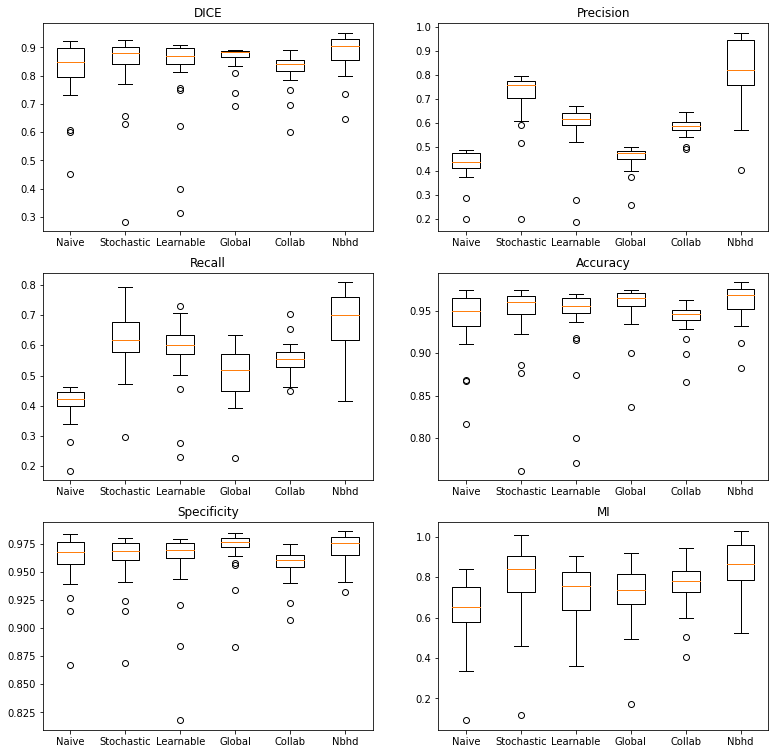

In [67]:
models = ["Naive", "Stochastic", "Learnable", "Global", "Collab", "Nbhd"]
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2)
fig.set_figheight(13)
fig.set_figwidth(13)
ax1.boxplot([naive_d, stoch_d, learn_d, global_d, collab_d, nbhd_d])
ax1.set_title("DICE")
ax1.set_xticklabels(models)

ax2.boxplot([naive_p, stoch_p, learn_p, global_p, collab_p, nbhd_p])
ax2.set_title("Precision")
ax2.set_xticklabels(models)

ax3.boxplot([naive_r, stoch_r, learn_r, global_r, collab_r, nbhd_r])
ax3.set_title("Recall")
ax3.set_xticklabels(models)

ax4.boxplot([naive_a, stoch_a, learn_a, global_a, collab_a, nbhd_a])
ax4.set_title("Accuracy")
ax4.set_xticklabels(models)

ax5.boxplot([naive_s, stoch_s, learn_s, global_s, collab_s, nbhd_s])
ax5.set_title("Specificity")
ax5.set_xticklabels(models)

ax6.boxplot([naive_m, stoch_m, learn_m, global_m, collab_m, nbhd_m])
ax6.set_title("MI")
ax6.set_xticklabels(models)

fig.savefig("example.png")
fig.show()

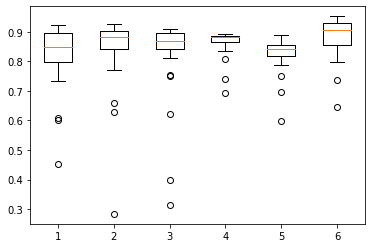

In [68]:
plt.boxplot([naive_d, stoch_d, learn_d, global_d, collab_d, nbhd_d])
plt.show()

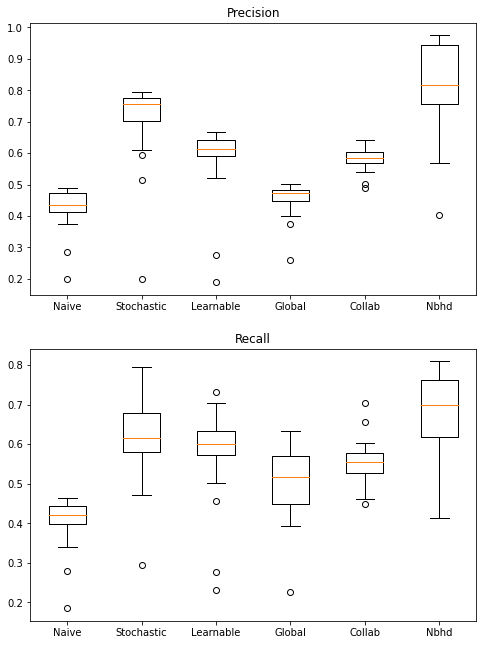

In [74]:
models = ["Naive", "Stochastic", "Learnable", "Global", "Collab", "Nbhd"]
fig, (ax1, ax2) = plt.subplots(2)
fig.set_figheight(11)
fig.set_figwidth(8)
ax1.boxplot([naive_p, stoch_p, learn_p, global_p, collab_p, nbhd_p])
ax1.set_title("Precision")
ax1.set_xticklabels(models)

ax2.boxplot([naive_r, stoch_r, learn_r, global_r, collab_r, nbhd_r])
ax2.set_title("Recall")
ax2.set_xticklabels(models)

fig.savefig("PR.png")
fig.show()

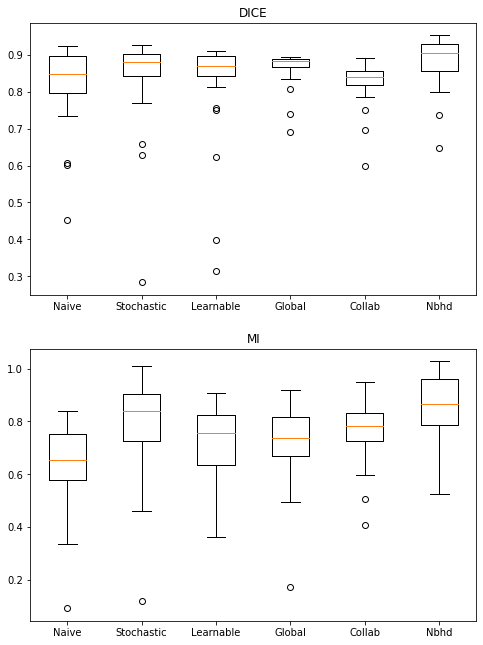

In [75]:
models = ["Naive", "Stochastic", "Learnable", "Global", "Collab", "Nbhd"]
fig, (ax1, ax2) = plt.subplots(2)
fig.set_figheight(11)
fig.set_figwidth(8)
ax1.boxplot([naive_d, stoch_d, learn_d, global_d, collab_d, nbhd_d])
ax1.set_title("DICE")
ax1.set_xticklabels(models)

ax2.boxplot([naive_m, stoch_m, learn_m, global_m, collab_m, nbhd_m])
ax2.set_title("MI")
ax2.set_xticklabels(models)

fig.savefig("DM.png")
fig.show()

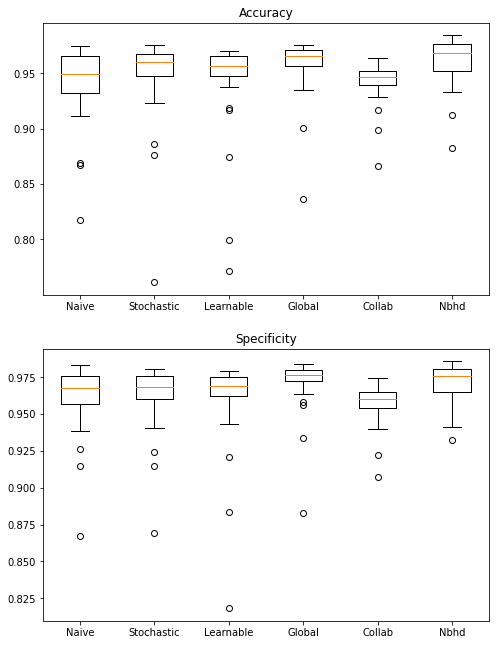

In [76]:
models = ["Naive", "Stochastic", "Learnable", "Global", "Collab", "Nbhd"]
fig, (ax1, ax2) = plt.subplots(2)
fig.set_figheight(11)
fig.set_figwidth(8)

ax1.boxplot([naive_a, stoch_a, learn_a, global_a, collab_a, nbhd_a])
ax1.set_title("Accuracy")
ax1.set_xticklabels(models)

ax2.boxplot([naive_s, stoch_s, learn_s, global_s, collab_s, nbhd_s])
ax2.set_title("Specificity")
ax2.set_xticklabels(models)


fig.savefig("AS.png")
fig.show()

In [77]:
# Mean DICE

print(np.mean(naive_d))
print(np.mean(stoch_d))
print(np.mean(learn_d))
print(np.mean(global_d))
print(np.mean(collab_d))
print(np.mean(nbhd_d))

0.8240277777777778
0.8427592592592593
0.8261388888888889
0.8659474747730371
0.8251296296296295
0.88102479338843


In [78]:
# Mean Precision

print(np.mean(naive_p))
print(np.mean(stoch_p))
print(np.mean(learn_p))
print(np.mean(global_p))
print(np.mean(collab_p))
print(np.mean(nbhd_p))

0.4293823017935709
0.7122061953372629
0.5919979262888925
0.4559919976978171
0.5852159449001203
0.8168974587845483


In [79]:
# Mean Recall

print(np.mean(naive_r))
print(np.mean(stoch_r))
print(np.mean(learn_r))
print(np.mean(global_r))
print(np.mean(collab_r))
print(np.mean(nbhd_r))

0.407148799458556
0.619435336753769
0.5836646947579336
0.5017680550096286
0.5549860070558512
0.6740976943024193


In [80]:
# Mean Accuracy

print(np.mean(naive_a))
print(np.mean(stoch_a))
print(np.mean(learn_a))
print(np.mean(global_a))
print(np.mean(collab_a))
print(np.mean(nbhd_a))

0.9413425925925927
0.9475864197530863
0.9420462962962964
0.9567037037037036
0.9417098765432098
0.9603415977961433


In [81]:
# Mean Specificity

print(np.mean(naive_s))
print(np.mean(stoch_s))
print(np.mean(learn_s))
print(np.mean(global_s))
print(np.mean(collab_s))
print(np.mean(nbhd_s))

0.961602349948473
0.9625010955154718
0.9594153197517243
0.9715105997088213
0.9570172758718123
0.9705681580057609


In [82]:
# Mean MI

print(np.mean(naive_m))
print(np.mean(stoch_m))
print(np.mean(learn_m))
print(np.mean(global_m))
print(np.mean(collab_m))
print(np.mean(nbhd_m))

0.6413153430018907
0.7954422557113517
0.7153520572021482
0.7228557759745307
0.7631189088109268
0.8645270244375711


{'whiskers': [<matplotlib.lines.Line2D at 0x7f277286d670>,
 'caps': [<matplotlib.lines.Line2D at 0x7f277286dd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f277286d310>,
 'medians': [<matplotlib.lines.Line2D at 0x7f2772880430>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2772880790>,
 'means': []}

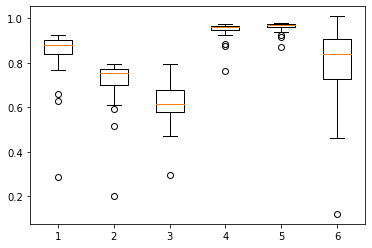

In [16]:
plt.boxplot([stoch_d, stoch_p, stoch_r, stoch_a, stoch_s, stoch_m])

In [2]:
stoch_p = np.load('1stoch_p.npy')
stoch_r = np.load('1stoch_r.npy')
stoch_a = np.load('1stoch_a.npy')
stoch_s = np.load('1stoch_s.npy')

In [3]:
boxplot_p = stoch_p
boxplot_r = stoch_r
boxplot_a = stoch_a
boxplot_s = stoch_s
#boxplot_mi = stoch_m

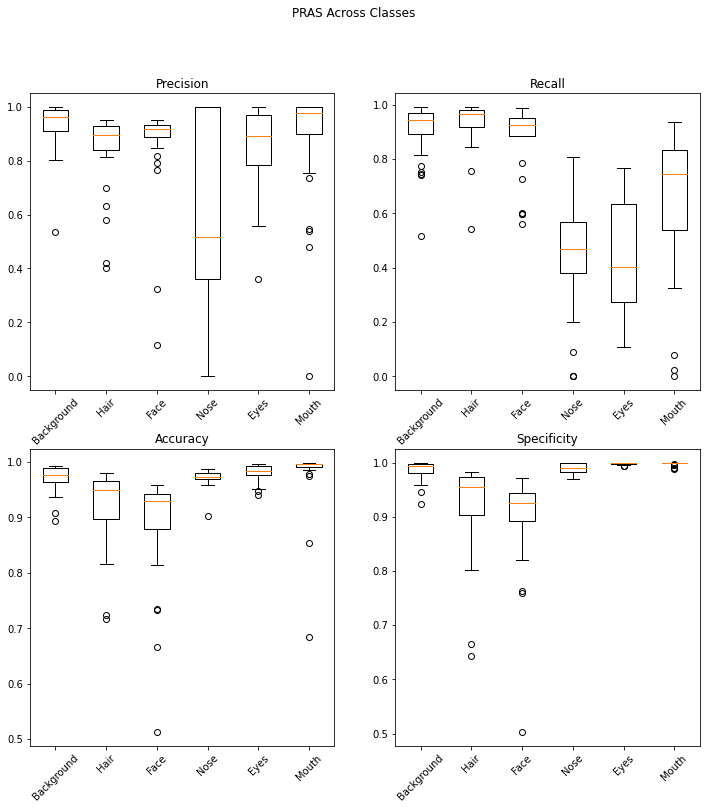

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
ax1.boxplot(boxplot_p)
ax1.set_title("Precision")
ax1.set_xticklabels(["Background", "Hair", "Face", "Nose", "Eyes", "Mouth"])

ax2.boxplot(boxplot_r)
ax2.set_title("Recall")
ax2.set_xticklabels(["Background", "Hair", "Face", "Nose", "Eyes", "Mouth"])

ax3.boxplot(boxplot_a)
ax3.set_title("Accuracy")
ax3.set_xticklabels(["Background", "Hair", "Face", "Nose", "Eyes", "Mouth"])

ax4.boxplot(boxplot_s)
ax4.set_title("Specificity")
ax4.set_xticklabels(["Background", "Hair", "Face", "Nose", "Eyes", "Mouth"])

fig.set_figwidth(12)
fig.set_figheight(12)

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)
fig.suptitle('PRAS Across Classes')

plt.savefig("1StochPrasClass.png")

{'whiskers': [<matplotlib.lines.Line2D at 0x7f276fcdb6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f276fcdbd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f276fcdb370>],
 'medians': [<matplotlib.lines.Line2D at 0x7f276fad9490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f276fad97f0>],
 'means': []}

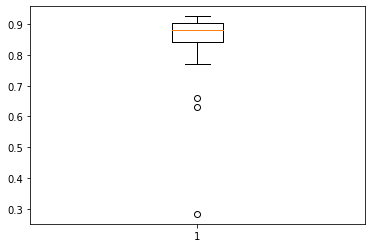

In [91]:
plt.boxplot(stoch_d)

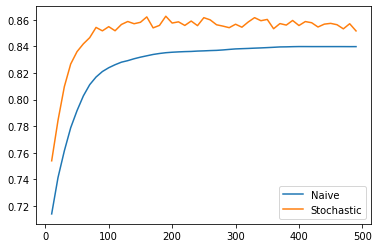

In [30]:
stab_naive = np.load('stability_naive.npy')
stab_stoch = np.load('stability_stoch.npy')
xs = [i*10 for i in range(1,50)]
plt.plot(xs, stab_naive)
plt.plot(xs, stab_stoch)
plt.legend(["Naive", "Stochastic"])
plt.savefig("stabilitycompare.png")
#plt.show()

In [35]:
np.save('stability_naive.npy', stab_naive)